# Risk Diversification

In [1]:
import pandas as pd 
import numpy as np 
import yfinance 
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
import warnings 
import scipy.optimize as sco
warnings.filterwarnings('ignore')
yfinance.pdr_override()
plt.style.use('fivethirtyeight')

In [2]:
port = pd.DataFrame()
tickers = ['ITMG.jk','APIC.jk', 'HEXA.jk', 'MFIN.jk','ARNA.jk'] 
for ticker in tickers:
    port[ticker] = wb.get_data_yahoo(ticker, start = '2019-04-01', end = '2023-04-30')['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


## Creating Monthly Data & Return

In [3]:
monthly_port = port.resample('BM').last()
monthly_port.head()

,ITMG.jk,APIC.jk,HEXA.jk,MFIN.jk,ARNA.jk
Date,,,,,
2019-04-30,10371.705078,590.0,1499.312256,812.439270,400.145691
2019-05-31,9454.572266,520.0,1475.129761,816.521912,396.222687
2019-06-28,9468.058594,575.0,1479.966309,873.678345,392.299713
2019-07-31,9076.927734,660.0,1625.061035,980.746765,443.298615
2019-08-30,7013.377441,695.0,1552.513672,980.746765,439.375702


In [4]:
monthly_return = monthly_port.pct_change().dropna()
monthly_return.head()

,ITMG.jk,APIC.jk,HEXA.jk,MFIN.jk,ARNA.jk
Date,,,,,
2019-05-31,-0.088426,-0.118644,-0.016129,0.005025,-0.009804
2019-06-28,0.001426,0.105769,0.003279,0.070000,-0.009901
2019-07-31,-0.041311,0.147826,0.098039,0.122549,0.130000
2019-08-30,-0.227340,0.053030,-0.044643,0.000000,-0.008849
2019-09-30,-0.046154,0.079137,0.074766,0.008734,-0.089286


## Monthly Return & Correlation

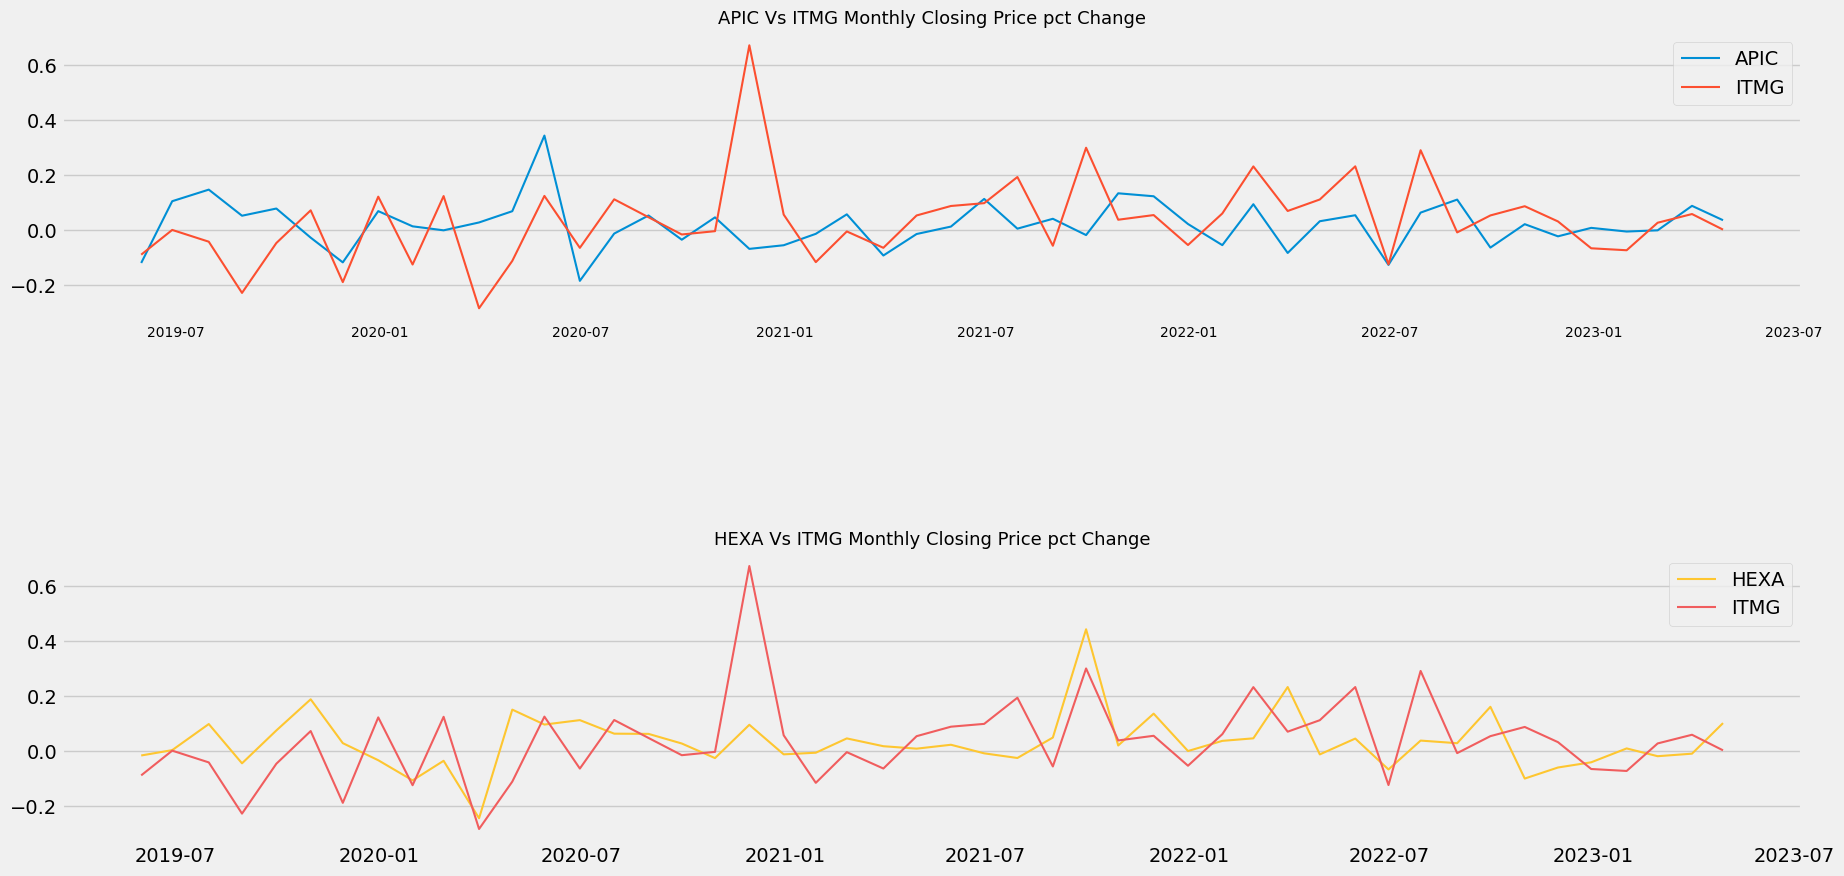

In [5]:
plt.figure(figsize = (20,10))
plt.subplot(2,1,1)
plt.plot(monthly_return.index, monthly_return.loc[:,["APIC.jk", 'ITMG.jk']], lw = 1.5)
plt.xticks(fontsize = 10)
plt.grid(axis = 'x')
plt.title('APIC Vs ITMG Monthly Closing Price pct Change', fontsize = 13)
plt.legend([ 'APIC','ITMG'])

plt.subplot(2,1,2)
plt.subplots_adjust(hspace=0.8)
plt.plot(monthly_return.index, monthly_return.loc[:,["HEXA.jk"]], lw = 1.5, color ='#fec630')
plt.plot(monthly_return.index, monthly_return.loc[:,["ITMG.jk"]], lw = 1.5, color ='#f05d5e')
plt.grid(axis = 'x')
plt.legend([ 'HEXA','ITMG'])
plt.title('HEXA Vs ITMG Monthly Closing Price pct Change', fontsize = 13)
plt.show()

### Correlation 

In [6]:
monthly_return.corr()

,ITMG.jk,APIC.jk,HEXA.jk,MFIN.jk,ARNA.jk
ITMG.jk,1.000000,0.100936,0.390866,0.014884,0.247639
APIC.jk,0.100936,1.000000,-0.017617,-0.240180,0.037402
HEXA.jk,0.390866,-0.017617,1.000000,0.276269,0.071472
MFIN.jk,0.014884,-0.240180,0.276269,1.000000,-0.047405
ARNA.jk,0.247639,0.037402,0.071472,-0.047405,1.000000


### Creating Portolio of several combination of stocks 

In [7]:
monthly_return['APICMFIN'] = monthly_return[['APIC.jk', 'MFIN.jk']].mean(axis = 1)
monthly_return.head()

,ITMG.jk,APIC.jk,HEXA.jk,MFIN.jk,ARNA.jk,APICMFIN
Date,,,,,,
2019-05-31,-0.088426,-0.118644,-0.016129,0.005025,-0.009804,-0.056809
2019-06-28,0.001426,0.105769,0.003279,0.070000,-0.009901,0.087885
2019-07-31,-0.041311,0.147826,0.098039,0.122549,0.130000,0.135188
2019-08-30,-0.227340,0.053030,-0.044643,0.000000,-0.008849,0.026515
2019-09-30,-0.046154,0.079137,0.074766,0.008734,-0.089286,0.043935


In [8]:
monthly_return['HEXAMFIN'] = monthly_return[['HEXA.jk', 'MFIN.jk']].mean(axis = 1)
monthly_return.head()


,ITMG.jk,APIC.jk,HEXA.jk,MFIN.jk,ARNA.jk,APICMFIN,HEXAMFIN
Date,,,,,,,
2019-05-31,-0.088426,-0.118644,-0.016129,0.005025,-0.009804,-0.056809,-0.005552
2019-06-28,0.001426,0.105769,0.003279,0.070000,-0.009901,0.087885,0.036639
2019-07-31,-0.041311,0.147826,0.098039,0.122549,0.130000,0.135188,0.110294
2019-08-30,-0.227340,0.053030,-0.044643,0.000000,-0.008849,0.026515,-0.022321
2019-09-30,-0.046154,0.079137,0.074766,0.008734,-0.089286,0.043935,0.041750


In [9]:
monthly_return['ARNAMFIN'] = monthly_return[['ARNA.jk', 'MFIN.jk']].mean(axis = 1)
monthly_return.head()

,ITMG.jk,APIC.jk,HEXA.jk,MFIN.jk,ARNA.jk,APICMFIN,HEXAMFIN,ARNAMFIN
Date,,,,,,,,
2019-05-31,-0.088426,-0.118644,-0.016129,0.005025,-0.009804,-0.056809,-0.005552,-0.002389
2019-06-28,0.001426,0.105769,0.003279,0.070000,-0.009901,0.087885,0.036639,0.030049
2019-07-31,-0.041311,0.147826,0.098039,0.122549,0.130000,0.135188,0.110294,0.126274
2019-08-30,-0.227340,0.053030,-0.044643,0.000000,-0.008849,0.026515,-0.022321,-0.004425
2019-09-30,-0.046154,0.079137,0.074766,0.008734,-0.089286,0.043935,0.041750,-0.040276


### Plotting Combination of Stocks Portfolio

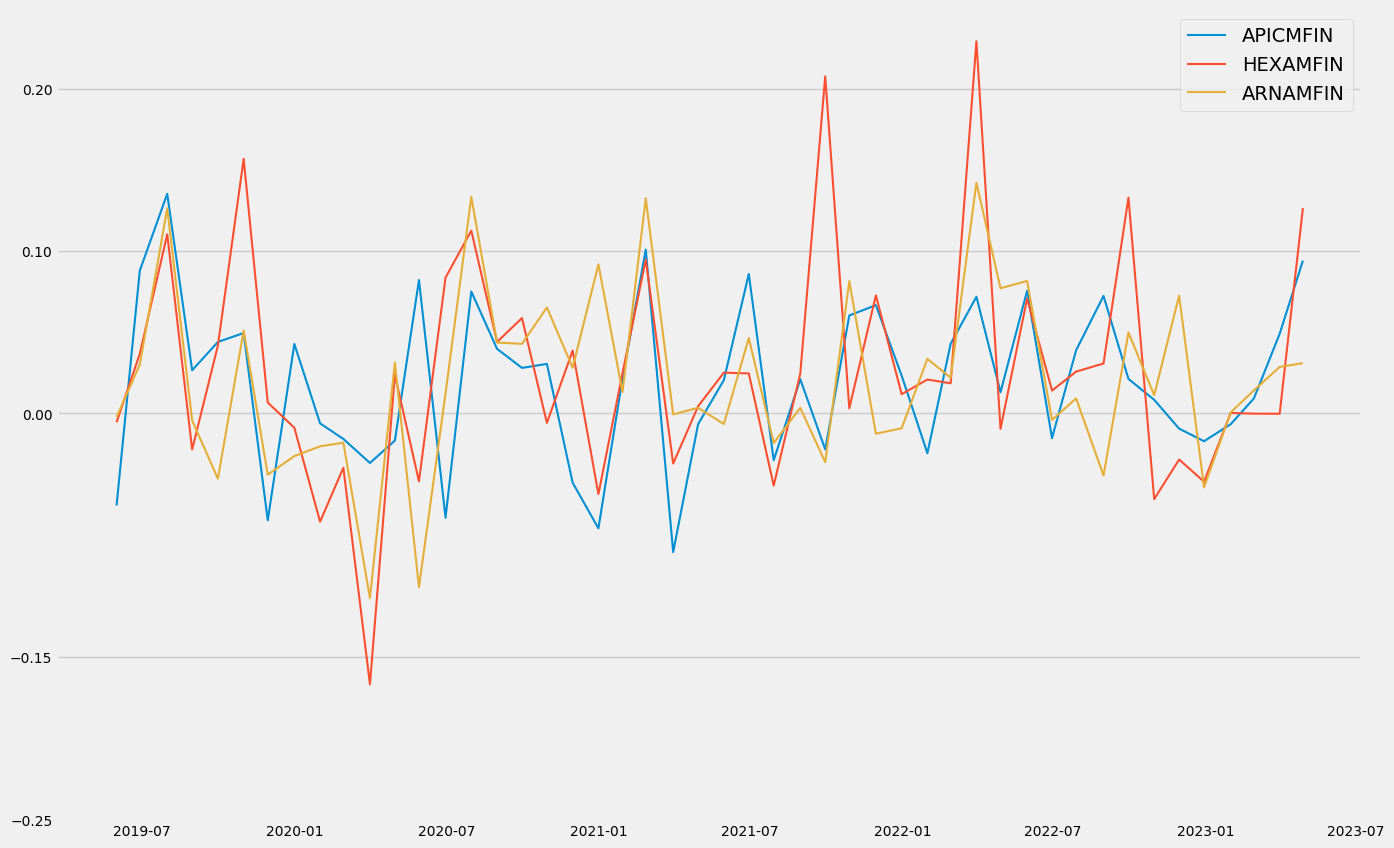

In [10]:
plt.figure(figsize = (15, 10))
plt.plot(monthly_return.index, monthly_return.loc[:,["APICMFIN", 'HEXAMFIN', 'ARNAMFIN']], lw = 1.5)
plt.xticks(fontsize = 10)
plt.yticks([-0.25, -0.15,0,0.10,0.20],fontsize = 10)
plt.legend(['APICMFIN','HEXAMFIN' ,'ARNAMFIN'])
plt.grid(axis = 'x')

## Creating Summary & Standard Deviation of Return

In [11]:
summary = monthly_return.agg(['mean', 'std'])
summary

,ITMG.jk,APIC.jk,HEXA.jk,MFIN.jk,ARNA.jk,APICMFIN,HEXAMFIN,ARNAMFIN
mean,0.034852,0.019689,0.032805,0.019851,0.020632,0.019770,0.026328,0.020242
std,0.153293,0.087431,0.100776,0.074806,0.083465,0.050245,0.070564,0.054705


In [12]:
ret = port.pct_change().dropna()
ret.head()

,ITMG.jk,APIC.jk,HEXA.jk,MFIN.jk,ARNA.jk
Date,,,,,
2019-04-02,0.003145,0.009009,0.013115,0.033333,0.000000
2019-04-03,0.000000,0.000000,0.000000,0.000000,0.000000
2019-04-04,-0.045932,-0.017857,0.000000,-0.013825,-0.009804
2019-04-05,-0.023952,0.045455,0.022654,0.000000,0.009901
2019-04-08,-0.038037,-0.008696,0.000000,0.009346,-0.019608


## Optimum Weight Portfolios

In [13]:
def annual_return(return_df):
    downside = return_df.copy()
    downside[downside >0] = 0
    downside = downside.agg(['std']).T
    downside.columns = ['downside_risk']
    
    summary = return_df.agg(['mean', 'std']).T
    summary.columns = ['return', 'risk']
    summary['return'] = summary['return'] * 250
    summary['risk'] = summary['risk'] * 250**0.5
    summary['downside_risk'] =downside['downside_risk'] * 250**0.5 
    return summary

In [14]:
rf = [0.0635,0]

In [15]:
noa = len(ret.columns)
noa # number of assests

def port_ret(weights):
    return ret.dot(weights.T).mean() * 250

def port_vol(weights):
    return ret.dot(weights.T).std() * np.sqrt(250)

#define function to be minimized (sco only supports minimize, not maximize)
#-> maximize sharpe ratio == minimize sharpe ratio * (-1)
def min_func_sharpe(weights):
    port_return = port_ret(weights)
    port_volatility = port_vol(weights)
    sharpe_ratio = (port_return - rf[0]) / port_volatility
    return -1 * sharpe_ratio

In [16]:
eweights = np.full(noa , 1/noa)
cons = ({"type": "eq", "fun": lambda x: np.sum(x) - 1})
bnds =  tuple((0,1) for x in range(noa))
opts = sco.minimize(min_func_sharpe, eweights, method = "SLSQP", bounds = bnds, constraints= cons)
optimum_weight = opts['x']
opt_weight = pd.Series(index = ret.columns, data = optimum_weight)
opt_weight

ITMG.jk    0.084233
APIC.jk    0.228528
HEXA.jk    0.317425
MFIN.jk    0.136775
ARNA.jk    0.233039
dtype: float64

In [17]:
ret['MP'] = ret.dot(opt_weight)
ret.head()

,ITMG.jk,APIC.jk,HEXA.jk,MFIN.jk,ARNA.jk,MP
Date,,,,,,
2019-04-02,0.003145,0.009009,0.013115,0.033333,0.000000,0.011046
2019-04-03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2019-04-04,-0.045932,-0.017857,0.000000,-0.013825,-0.009804,-0.012125
2019-04-05,-0.023952,0.045455,0.022654,0.000000,0.009901,0.017868
2019-04-08,-0.038037,-0.008696,0.000000,0.009346,-0.019608,-0.008482


## Systematic Risk Vs Unsystematic Risk

In [18]:
summary_port = annual_return(ret)
summary_port

,return,risk,downside_risk
ITMG.jk,0.358934,0.449710,0.235663
APIC.jk,0.241872,0.266538,0.155359
HEXA.jk,0.386666,0.319469,0.164387
MFIN.jk,0.260833,0.379647,0.207990
ARNA.jk,0.248023,0.290783,0.152230
MP,0.301721,0.168635,0.091146


In [19]:
summary_port['sharpe'] = (summary_port['return'].sub(0.0635))/summary_port['risk']
summary_port['sortino'] = (summary_port['return'].sub(0.0635))/summary_port['downside_risk']
summary_port

,return,risk,downside_risk,sharpe,sortino
ITMG.jk,0.358934,0.449710,0.235663,0.656943,1.253629
APIC.jk,0.241872,0.266538,0.155359,0.669218,1.148133
HEXA.jk,0.386666,0.319469,0.164387,1.011572,1.965889
MFIN.jk,0.260833,0.379647,0.207990,0.519780,0.948760
ARNA.jk,0.248023,0.290783,0.152230,0.634575,1.212139
MP,0.301721,0.168635,0.091146,1.412638,2.613604


In [20]:
summary_port['total_risk_var'] = np.power(summary_port['risk'],2)
summary_port.head()

,return,risk,downside_risk,sharpe,sortino,total_risk_var
ITMG.jk,0.358934,0.449710,0.235663,0.656943,1.253629,0.202239
APIC.jk,0.241872,0.266538,0.155359,0.669218,1.148133,0.071043
HEXA.jk,0.386666,0.319469,0.164387,1.011572,1.965889,0.102061
MFIN.jk,0.260833,0.379647,0.207990,0.519780,0.948760,0.144132
ARNA.jk,0.248023,0.290783,0.152230,0.634575,1.212139,0.084555


In [21]:
COV = ret.cov() * 250
COV

,ITMG.jk,APIC.jk,HEXA.jk,MFIN.jk,ARNA.jk,MP
ITMG.jk,0.202239,0.015448,0.039338,0.007388,0.005335,0.035306
APIC.jk,0.015448,0.071043,0.005945,0.006185,0.004355,0.021284
HEXA.jk,0.039338,0.005945,0.102061,0.006024,0.002959,0.038582
MFIN.jk,0.007388,0.006185,0.006024,0.144132,-0.000482,0.023549
ARNA.jk,0.005335,0.004355,0.002959,-0.000482,0.084555,0.022022
MP,0.035306,0.021284,0.038582,0.023549,0.022022,0.028438


In [22]:
COV.iloc[:-1, -1].dot(opt_weight)
# opt_weight

0.028437877530244057

In [23]:
summary_port['systematic_risk'] = COV.iloc[-1, :]
summary_port['unsystematic_risk'] = summary_port['total_risk_var'].sub(summary_port['systematic_risk'])
summary_port

,return,risk,downside_risk,sharpe,sortino,total_risk_var,systematic_risk,unsystematic_risk
ITMG.jk,0.358934,0.449710,0.235663,0.656943,1.253629,0.202239,0.035306,1.669328e-01
APIC.jk,0.241872,0.266538,0.155359,0.669218,1.148133,0.071043,0.021284,4.975837e-02
HEXA.jk,0.386666,0.319469,0.164387,1.011572,1.965889,0.102061,0.038582,6.347867e-02
MFIN.jk,0.260833,0.379647,0.207990,0.519780,0.948760,0.144132,0.023549,1.205822e-01
ARNA.jk,0.248023,0.290783,0.152230,0.634575,1.212139,0.084555,0.022022,6.253235e-02
MP,0.301721,0.168635,0.091146,1.412638,2.613604,0.028438,0.028438,-3.469447e-18


## Visualizing Systematic & Unsystematic Risk

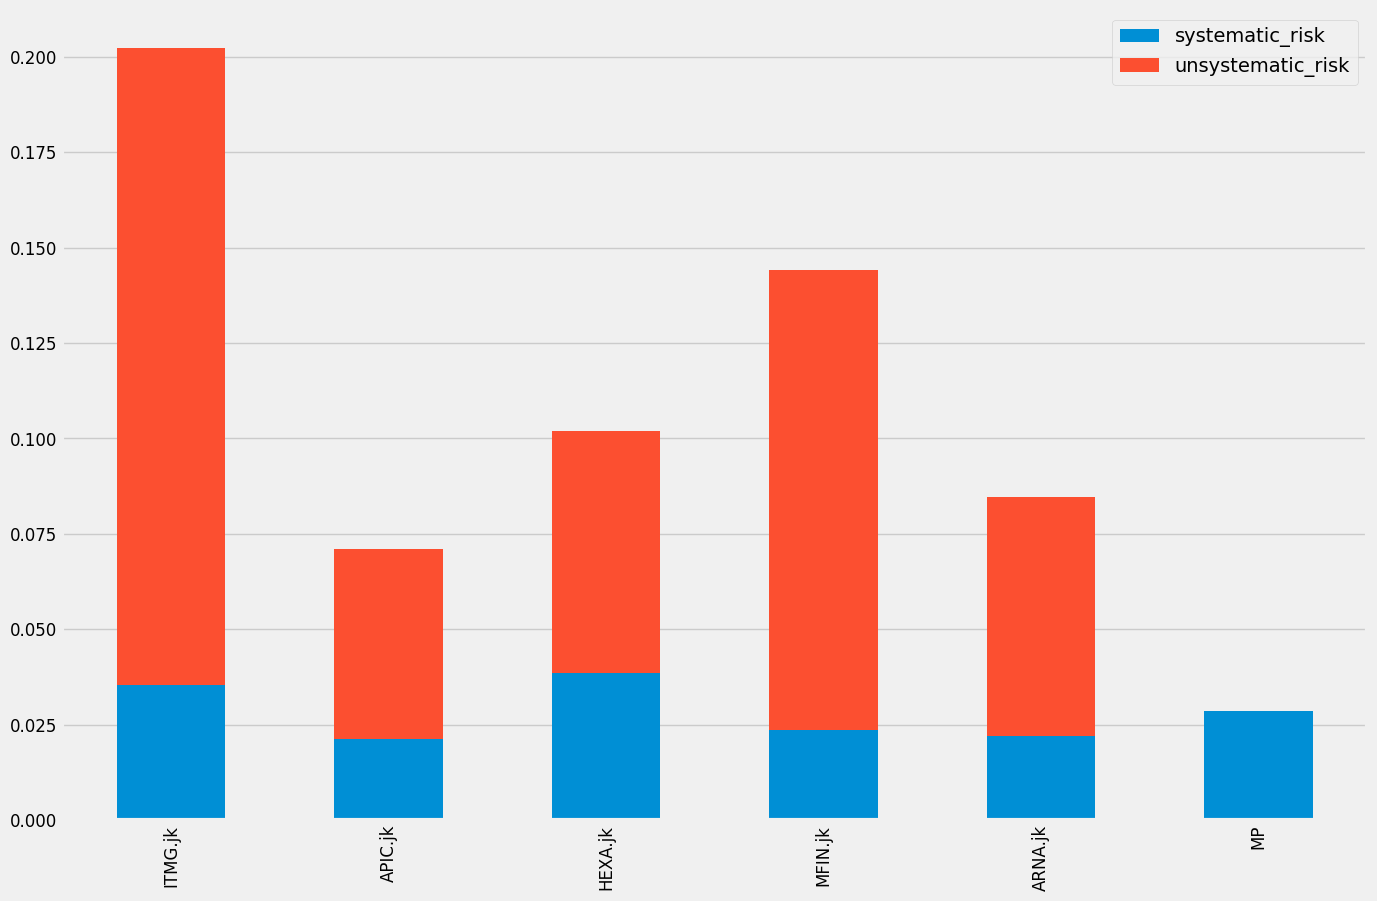

In [24]:
summary_port.iloc[:, -2:].plot(kind= 'bar', stacked = True, figsize = (15, 10), fontsize = 12)
plt.grid(axis = 'x')
plt.show()

# Capital Asset Pricing Model (CAPM) & Security Market Line (SLM)

In [25]:
summary_port

,return,risk,downside_risk,sharpe,sortino,total_risk_var,systematic_risk,unsystematic_risk
ITMG.jk,0.358934,0.449710,0.235663,0.656943,1.253629,0.202239,0.035306,1.669328e-01
APIC.jk,0.241872,0.266538,0.155359,0.669218,1.148133,0.071043,0.021284,4.975837e-02
HEXA.jk,0.386666,0.319469,0.164387,1.011572,1.965889,0.102061,0.038582,6.347867e-02
MFIN.jk,0.260833,0.379647,0.207990,0.519780,0.948760,0.144132,0.023549,1.205822e-01
ARNA.jk,0.248023,0.290783,0.152230,0.634575,1.212139,0.084555,0.022022,6.253235e-02
MP,0.301721,0.168635,0.091146,1.412638,2.613604,0.028438,0.028438,-3.469447e-18


In [26]:
summary_port['systematic_risk'] / summary_port.loc['MP', 'systematic_risk']

ITMG.jk    1.241510
APIC.jk    0.748452
HEXA.jk    1.356713
MFIN.jk    0.828096
ARNA.jk    0.774397
MP         1.000000
Name: systematic_risk, dtype: float64

In [27]:
summary_port['beta'] = summary_port['systematic_risk'] / summary_port.loc['MP', 'systematic_risk']
summary_port

,return,risk,downside_risk,sharpe,sortino,total_risk_var,systematic_risk,unsystematic_risk,beta
ITMG.jk,0.358934,0.449710,0.235663,0.656943,1.253629,0.202239,0.035306,1.669328e-01,1.241510
APIC.jk,0.241872,0.266538,0.155359,0.669218,1.148133,0.071043,0.021284,4.975837e-02,0.748452
HEXA.jk,0.386666,0.319469,0.164387,1.011572,1.965889,0.102061,0.038582,6.347867e-02,1.356713
MFIN.jk,0.260833,0.379647,0.207990,0.519780,0.948760,0.144132,0.023549,1.205822e-01,0.828096
ARNA.jk,0.248023,0.290783,0.152230,0.634575,1.212139,0.084555,0.022022,6.253235e-02,0.774397
MP,0.301721,0.168635,0.091146,1.412638,2.613604,0.028438,0.028438,-3.469447e-18,1.000000


## Visualizing Beta factor & Return 

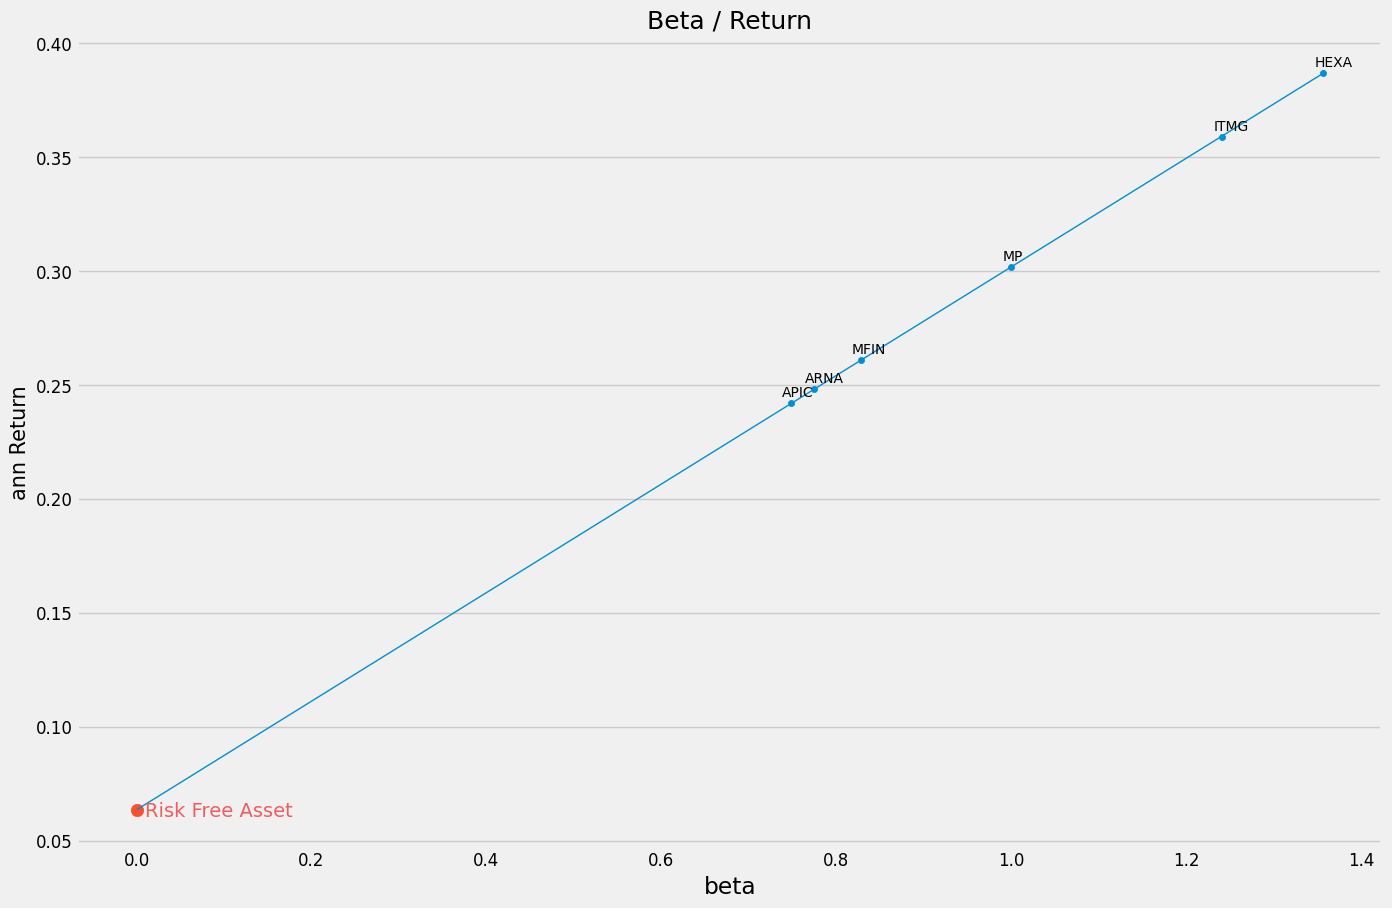

In [61]:
plt.figure(figsize = (15 ,10))
plt.scatter(summary_port['beta'], summary_port['return'], s= 20)
for i in summary_port.index :
    plt.annotate(i.replace('.jk', ''), xy = (summary_port.loc[i,'beta'] - 0.01, summary_port.loc[i, 'return'] + 0.003), size = 10)
plt.plot([rf[1], summary_port.loc['HEXA.jk', 'beta']], [rf[0],summary_port.loc['HEXA.jk', 'return']], lw= 1)
plt.scatter(rf[1], rf[0], marker = 'o', s = 80)
plt.annotate('Risk Free Asset', xy = (rf[1] + 0.01, rf[0] - 0.0028), c = '#f05d5e')
plt.xlabel('beta')
plt.xticks(size = 12)
plt.ylabel('ann Return', size = 15)
plt.yticks(size =12)
plt.title('Beta / Return', size = 18)
plt.grid(axis = 'x')

### Formula

**CAPM Formula**

y = i + slope * x

Return = RFR + (Market Portfolio Return - RFR) * beta

In [62]:
rf[0] + (summary_port.loc["MP", 'return'] - rf[0]) * summary_port.beta

ITMG.jk    0.359253
APIC.jk    0.241797
HEXA.jk    0.386697
MFIN.jk    0.260769
ARNA.jk    0.247977
MP         0.301721
Name: beta, dtype: float64

In [63]:
summary_port['capm_ret'] = rf[0] + (summary_port.loc["MP", 'return'] - rf[0]) * summary_port.beta
summary_port

,return,risk,downside_risk,sharpe,sortino,total_risk_var,systematic_risk,unsystematic_risk,beta,capm_ret
ITMG.jk,0.358934,0.449710,0.235663,0.656943,1.253629,0.202239,0.035306,1.669328e-01,1.241510,0.359253
APIC.jk,0.241872,0.266538,0.155359,0.669218,1.148133,0.071043,0.021284,4.975837e-02,0.748452,0.241797
HEXA.jk,0.386666,0.319469,0.164387,1.011572,1.965889,0.102061,0.038582,6.347867e-02,1.356713,0.386697
MFIN.jk,0.260833,0.379647,0.207990,0.519780,0.948760,0.144132,0.023549,1.205822e-01,0.828096,0.260769
ARNA.jk,0.248023,0.290783,0.152230,0.634575,1.212139,0.084555,0.022022,6.253235e-02,0.774397,0.247977
MP,0.301721,0.168635,0.091146,1.412638,2.613604,0.028438,0.028438,-3.469447e-18,1.000000,0.301721


# Appendix 

## Note 

- Systematic risk is a market risk that cannot be diversified with other stocks 
- Unsystematic risk is a risk that could be diversified with other stocks